## Analysis on buy/sell data

In [1]:
import sys
sys.path.append('../')
from macd import *

In [2]:
buy, sell = [], []

In [3]:
years = ['2020', '2021', '2022']
for y in years:
    df = pd.read_csv(f"../data/adausdt_{y}.csv")
    macd_bot = MACDStrategy(df['Close'])
    buy.extend(np.array(macd_bot.buy)[np.isfinite(macd_bot.buy)])
    sell.extend(np.array(macd_bot.sell)[np.isfinite(macd_bot.sell)])

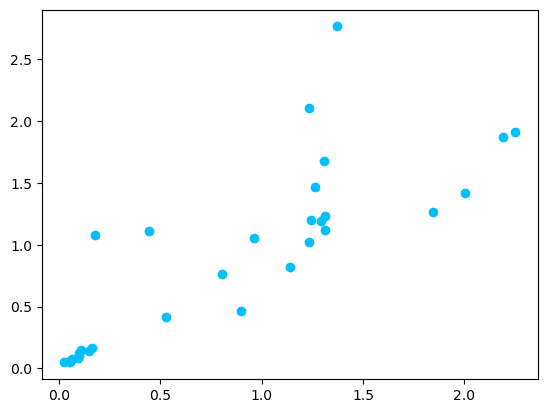

In [4]:
fig,ax = plt.subplots()
X = np.array(buy[:-2])
y = np.array(sell)
ax.scatter(X, y, marker='o', c='deepskyblue')

In [5]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [7]:
import math

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.41e-01  dj_dw: -1.180e+00, dj_db: -8.984e-01   w:  1.180e-02, b: 8.98437e-03
Iteration 1000: Cost 8.52e-02  dj_dw: -6.187e-03, dj_db:  7.011e-03   w:  8.278e-01, b: 1.95604e-01
Iteration 2000: Cost 8.50e-02  dj_dw: -5.409e-04, dj_db:  6.130e-04   w:  8.510e-01, b: 1.69380e-01
Iteration 3000: Cost 8.50e-02  dj_dw: -4.730e-05, dj_db:  5.360e-05   w:  8.530e-01, b: 1.67087e-01
Iteration 4000: Cost 8.50e-02  dj_dw: -4.136e-06, dj_db:  4.687e-06   w:  8.532e-01, b: 1.66887e-01
Iteration 5000: Cost 8.50e-02  dj_dw: -3.616e-07, dj_db:  4.098e-07   w:  8.532e-01, b: 1.66869e-01
Iteration 6000: Cost 8.50e-02  dj_dw: -3.162e-08, dj_db:  3.583e-08   w:  8.532e-01, b: 1.66868e-01
Iteration 7000: Cost 8.50e-02  dj_dw: -2.765e-09, dj_db:  3.133e-09   w:  8.532e-01, b: 1.66868e-01
Iteration 8000: Cost 8.50e-02  dj_dw: -2.417e-10, dj_db:  2.740e-10   w:  8.532e-01, b: 1.66868e-01
Iteration 9000: Cost 8.50e-02  dj_dw: -2.114e-11, dj_db:  2.395e-11   w:  8.532e-01, b: 1.66868e-01


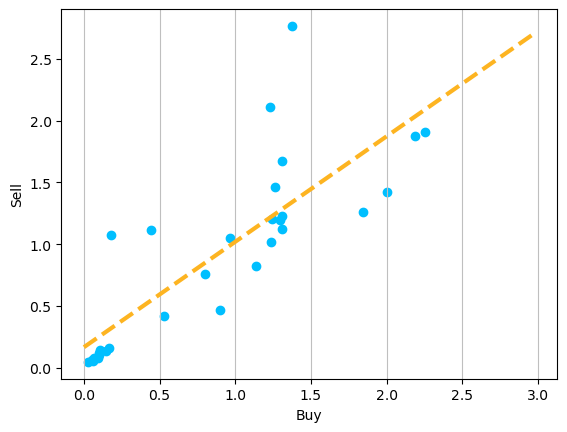

In [20]:
def f(x):
    return w_final * x + b_final

t1 = np.arange(0.0, 3.0, 0.02)

fig,ax = plt.subplots()
X = np.array(buy[:-2])
y = np.array(sell)
ax.scatter(X, y, marker='o', c='deepskyblue')
ax.set_xlabel('Buy')
ax.set_ylabel('Sell')
ax.plot(t1, f(t1), '--', c='#fdb421', linewidth=3)
plt.grid(axis='x', color='0.75')

Now we can determine the expected profit from this joint statistics
$$\mathbb{E}[\hat{Y}-X] = \mathbb{E}[\hat{Y}] - \mathbb{E}[X]$$

In [10]:
mu = np.mean(y) - np.mean(X)
mu

0.04097600000000012

and for the variance of profit of `adausdt` we will use:
$$\mathbb{V}(Y - X) = \mathbb{V}(Y) - 2Cov(X,Y) + \mathbb{V}(X)$$
where the formula of covariance is given as
$$Cov(X,Y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N - 1}$$

In [11]:
cov = np.dot(X - np.mean(X), y - np.mean(y)) / (len(X) - 1)
sigma = np.sqrt(np.var(y) - 2 * cov + np.var(X))
sigma

0.3899412227163241

(array([12.,  2.,  9.,  3.,  3.,  1.]),
 array([0.04755   , 0.50079167, 0.95403333, 1.407275  , 1.86051667,
        2.31375833, 2.767     ]),
 <BarContainer object of 6 artists>)

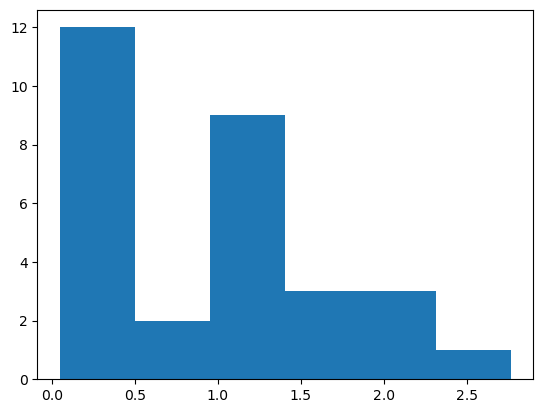

In [12]:
plt.hist(y, bins='auto')

Eyeballing through the histogram above, we suggest that the buy-sell data is exponentially distributed with $\lambda = 1$. 

We can determine the underlying distribution by performing Kolmogorov-Smirnov one sample test.

In [13]:
from scipy.stats import ks_2samp, kstest

In [14]:
ks_2samp(X, y)

KstestResult(statistic=0.16666666666666666, pvalue=0.8079631540901643)

In [15]:
kstest(X, 'expon')

KstestResult(statistic=0.20505825371311423, pvalue=0.13903686486004874)

With the p-value > 0.05, we do not reject null hypothesis. It is said that the 
buy and sell data are drawn from the same probability distributions.